In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
import matplotlib.image as pltimg
import graphviz 

############################
from sklearn import preprocessing, metrics
from sklearn.ensemble import RandomForestRegressor,VotingClassifier,RandomForestClassifier
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_predict, KFold, train_test_split,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.externals import joblib
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error,r2_score
from sklearn.tree._export import plot_tree


C:\Users\aleon\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import pandas; print("Pandas", pandas.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)
import matplotlib; print("Matplotlib", matplotlib.__version__)

Windows-10-10.0.18362-SP0
Python 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
NumPy 1.18.1
Pandas 1.0.3
SciPy 1.4.1
Scikit-Learn 0.22.1
Matplotlib 3.1.3


In [17]:
df_metricasAL = pd.read_csv('microdadosMetricasAlagoas.csv', sep = ';', encoding='ISO 8859-1')
df_metricasAL = df_metricasAL.loc[:, ~df_metricasAL.columns.str.contains('^Unnamed')]
df_metricasAL

,Modelo,Max_Error,MAE,R²,MSE,CV scores mean,CV scores std,Tempo de processamento min
0,Random Forest,485.11,58.77,0.40,5428.39,0.40,0.01,7.88
1,Regressão Linear,513.67,57.01,0.44,5072.02,0.43,0.01,0.25
2,Rede Neural,499.38,55.96,0.45,4965.24,0.45,0.02,20.82
3,Árvore de decisão,647.80,78.71,-0.12,10057.61,-0.11,0.01,2.31


In [18]:
df_metricasBR = pd.read_csv('microdadosMetricasNacional.csv', sep = ';', encoding='ISO 8859-1')
df_metricasBR = df_metricasBR.loc[:, ~df_metricasBR.columns.str.contains('^Unnamed')]
df_metricasBR

,Modelo,Max_Error,MAE,R²,MSE,CV scores mean,CV scores std,Tempo de processamento min
0,Random Forest,485.11,58.77,0.40,5428.39,0.40,0.01,8.23
1,Regressão Linear,513.67,57.01,0.44,5072.02,0.43,0.01,0.26
2,Rede Neural,499.38,55.96,0.45,4965.24,0.45,0.02,22.69
3,Árvore de decisão,647.80,78.71,-0.12,10057.61,-0.11,0.01,2.24


In [9]:
list(df_metricasAL.columns.values.tolist()) 

['Modelo',
 'Max_Error',
 'MAE',
 'R²',
 'MSE',
 'CV scores mean',
 'CV scores std',
 'Tempo de processamento min']

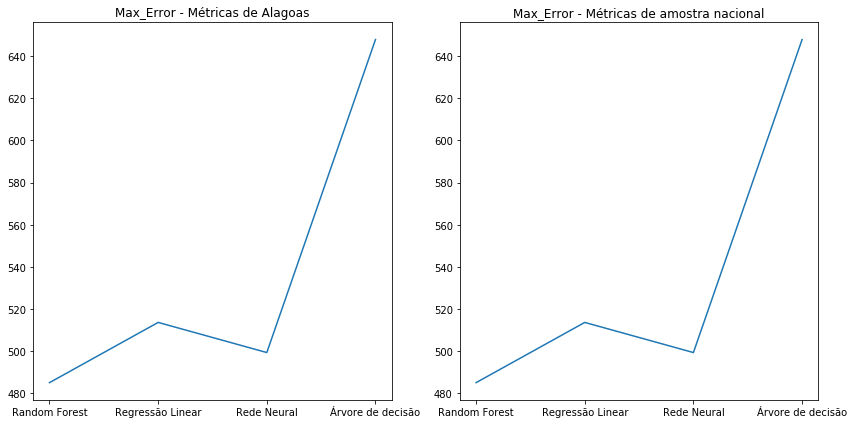

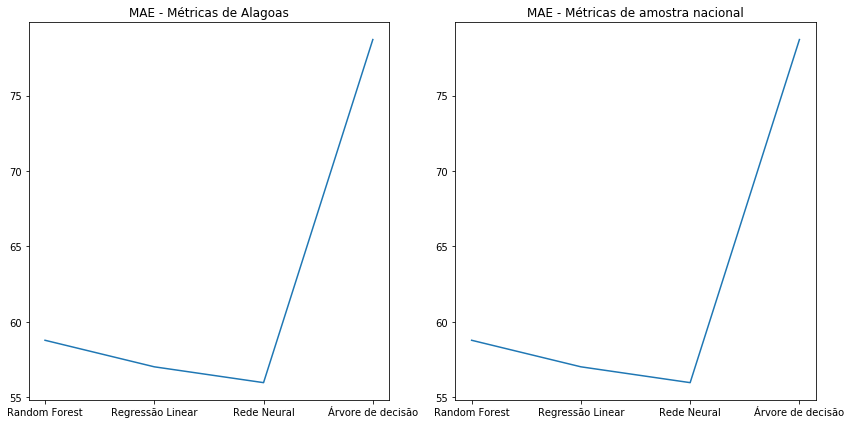

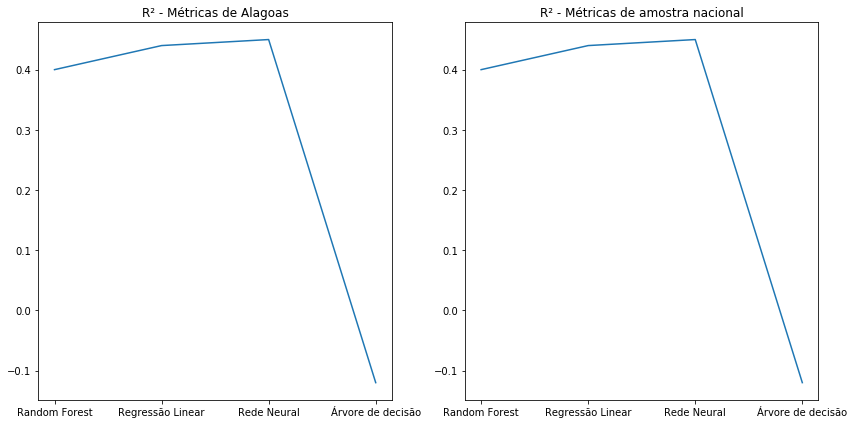

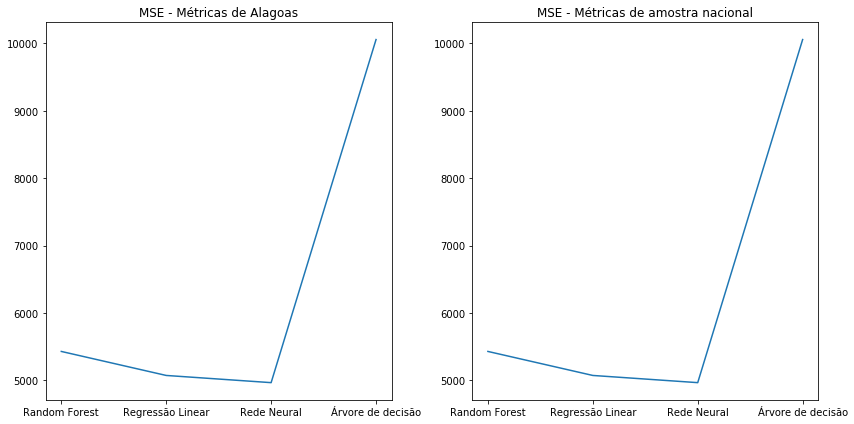

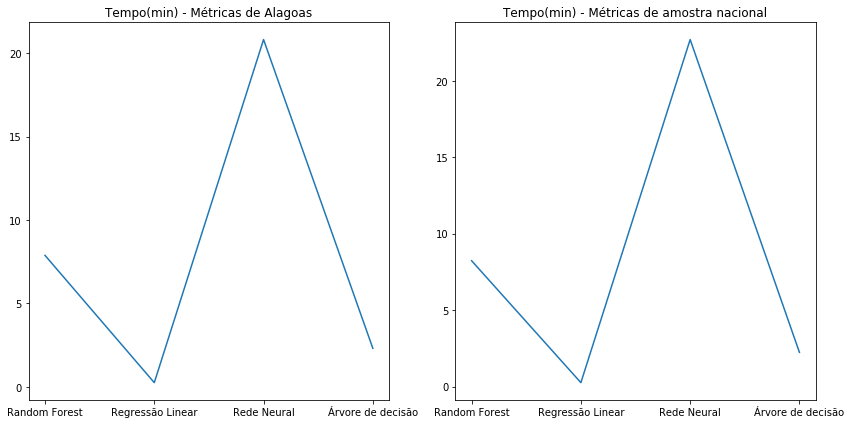

In [28]:

labels = [ 'Max_Error', 'MAE', 'R²', 'MSE', 'Tempo(min)']
colunas = ['Max_Error', 'MAE', 'R²', 'MSE', 'Tempo de processamento min']

for label, coluna in zip(labels, colunas):
    fig = plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1) 
    plt.plot(df_metricasAL['Modelo'], df_metricasAL[coluna])
    plt.title(label + ' - Métricas de Alagoas')

    plt.subplot(1, 2, 2)
    plt.plot(df_metricasBR['Modelo'], df_metricasBR[coluna])
    plt.title(label +' - Métricas de amostra nacional')    
   
    fig.tight_layout()
    plt.show()


# Max_Error

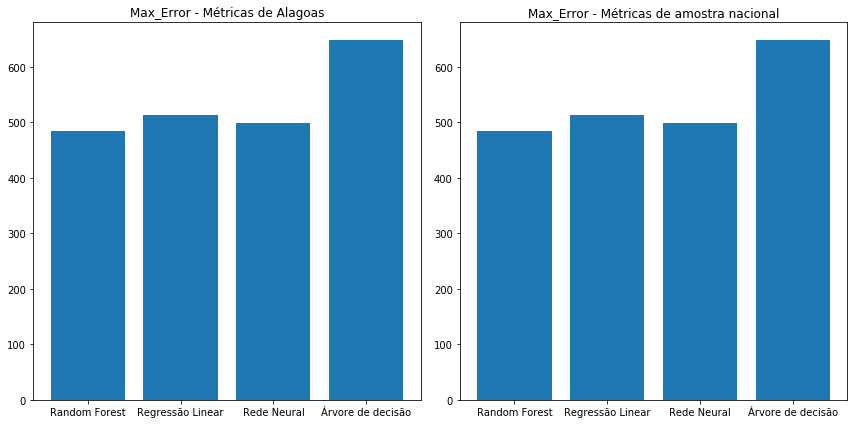

In [9]:
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
plt.bar(df_metricasAL['Modelo'], df_metricasAL['Max_Error'])
plt.title('Max_Error - Métricas de Alagoas')

plt.subplot(1, 2, 2)
plt.bar(df_metricasBR['Modelo'], df_metricasBR['Max_Error'])
plt.title("Max_Error - Métricas de amostra nacional")
fig.tight_layout()
plt.show()

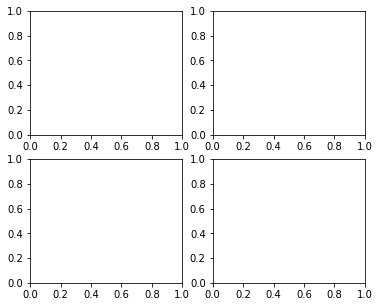

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(6, 5) )
axes = axes.flatten()



AttributeError: 'BarContainer' object has no attribute 'set_title'

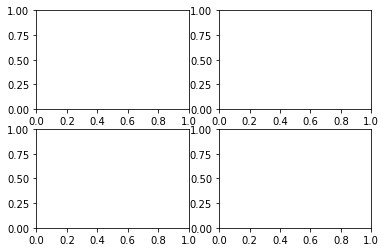

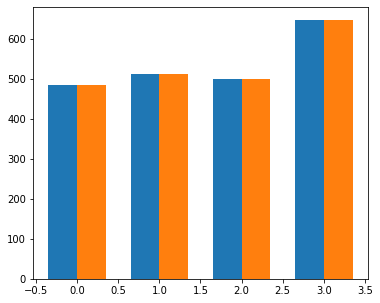

In [27]:

labels  = [ 'Max_Error', 'MAE', 'R²', 'MSE', 'Tempo (min)']
colunas = ['Max_Error', 'MAE', 'R²', 'MSE', 'Tempo de processamento min']
modelos = ['Random  Forest', 'Regressão Linear', 'Rede Neural', 'Árvore de Decisão']
width = 0.35  # the width of the bars
x = np.arange(len(df_metricasAL['Modelo']))  # the label locations


fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()



for label, coluna, i in zip(labels, colunas, axes):
    fig, ax = plt.subplots(figsize=(6, 5))
    
    
    i= ax.bar(x - width/2, df_metricasAL[coluna], width, label='Conjunto de Alagoas')
    i= ax.bar(x + width/2, df_metricasBR[coluna], width, label='Conjunto Amostra Nacional')
    
    i.set_title(label)
    i.set_xticks(x)
    i.set_xticklabels(modelos)
    i.legend()    
    
fig.tight_layout()
plt.savefig('imagens/metricasRE.png', format='png')
plt.show()
    









NameError: name 'ax1' is not defined

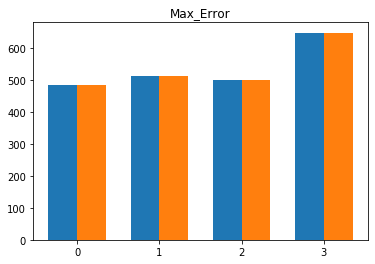

In [35]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#labels = [ 'Max_Error', 'MAE', 'R²', 'MSE', 'Tempo(min)']
#colunas = ['Max_Error', 'MAE', 'R²', 'MSE', 'Tempo de processamento min']


labels = ['Random  Forest', 'Regressão Linear', 'Rede Neural', 'Árvore de Decisão']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(df_metricasAL['Modelo']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_metricasAL['Max_Error'], width, label='Conjunto de Alagoas')

rects2 = ax.bar(x + width/2, df_metricasBR['Max_Error'], width, label=' Conjunto Amostra Nacional')

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Valor')
ax.set_title("Max_Error")
ax.set_xticks(x)
ax.set_ylim(ax1.get_ylim())

ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# MAE

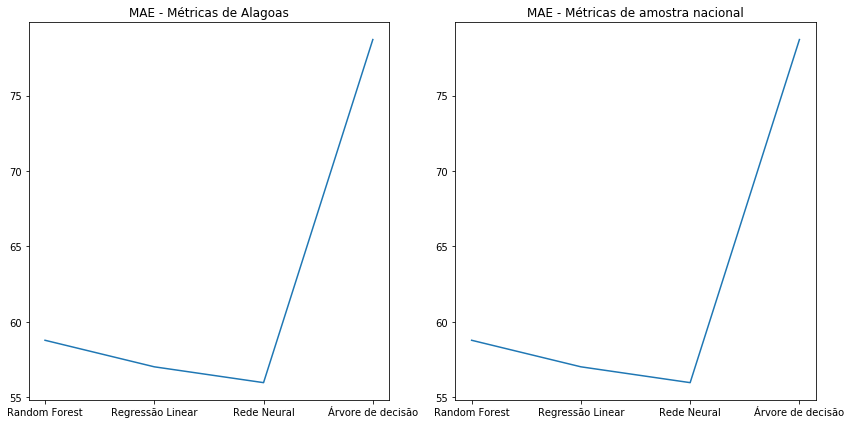

In [15]:
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(df_metricasAL['Modelo'], df_metricasAL['MAE'])
plt.title('MAE - Métricas de Alagoas')


plt.subplot(1, 2, 2)
plt.plot(df_metricasBR['Modelo'], df_metricasBR['MAE'])
plt.title("MAE - Métricas de amostra nacional")
fig.tight_layout()
plt.show()

# MSE

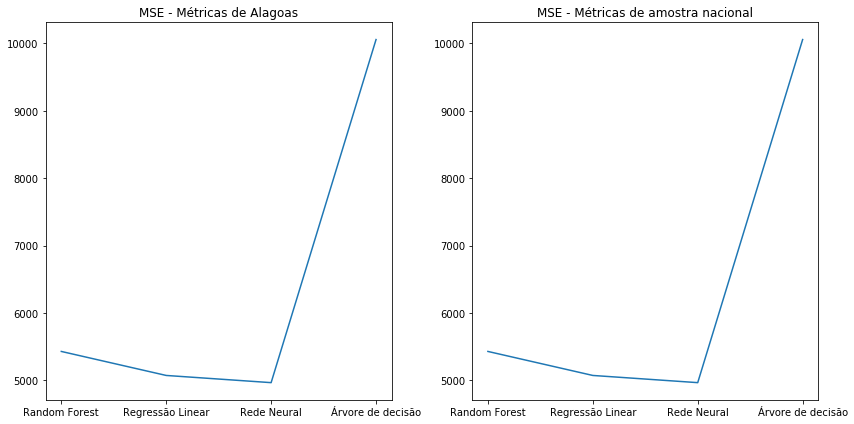

In [16]:
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(df_metricasAL['Modelo'], df_metricasAL['MSE'])
plt.title('MSE - Métricas de Alagoas')


plt.subplot(1, 2, 2)
plt.plot(df_metricasBR['Modelo'], df_metricasBR['MSE'])
plt.title("MSE - Métricas de amostra nacional")
fig.tight_layout()
plt.show()

# R²

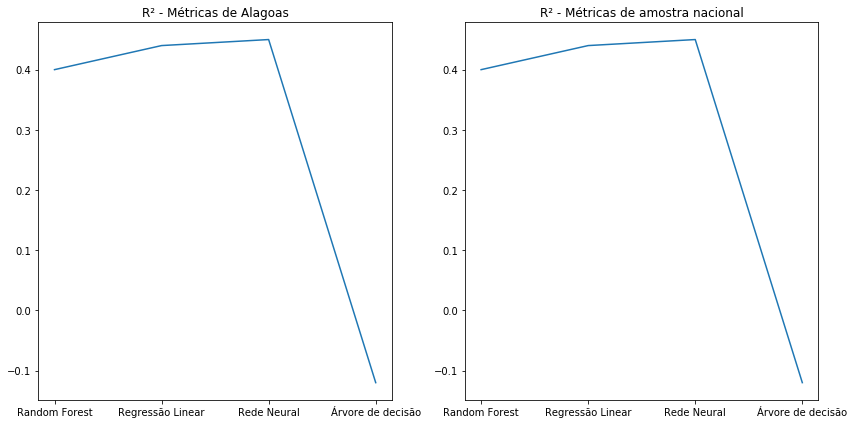

In [17]:
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(df_metricasAL['Modelo'], df_metricasAL['R²'])
plt.title('R² - Métricas de Alagoas')


plt.subplot(1, 2, 2)
plt.plot(df_metricasBR['Modelo'], df_metricasBR['R²'])
plt.title("R² - Métricas de amostra nacional")
fig.tight_layout()
plt.show()

# Tempo

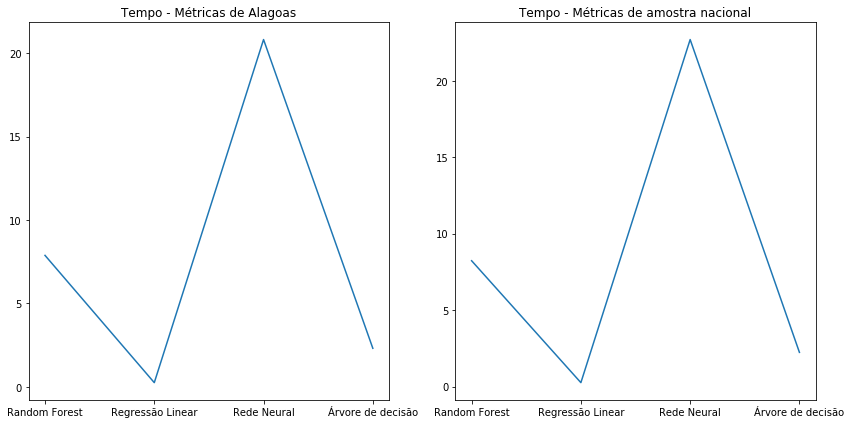

In [18]:
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(df_metricasAL['Modelo'], df_metricasAL['Tempo de processamento min'])
plt.title('Tempo - Métricas de Alagoas')


plt.subplot(1, 2, 2)
plt.plot(df_metricasBR['Modelo'], df_metricasBR['Tempo de processamento min'])
plt.title("Tempo - Métricas de amostra nacional")
fig.tight_layout()
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020FD4615E48>,
      dtype=object)

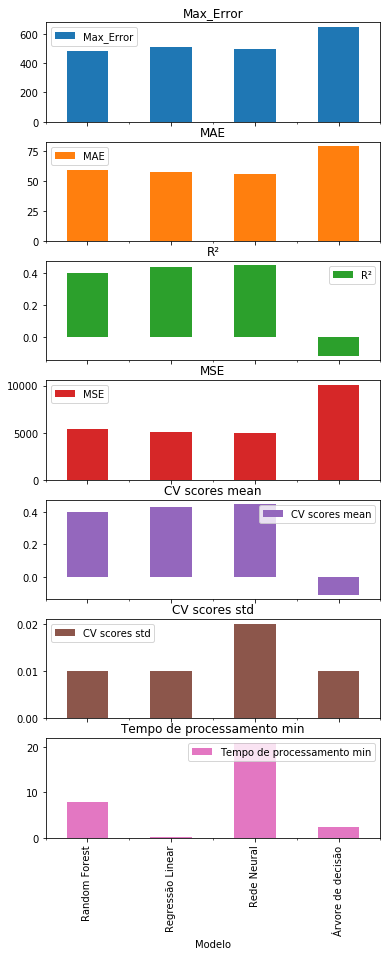

In [48]:
df_metricasAL.plot.bar(x = 'Modelo', subplots = True, figsize=(6, 15))

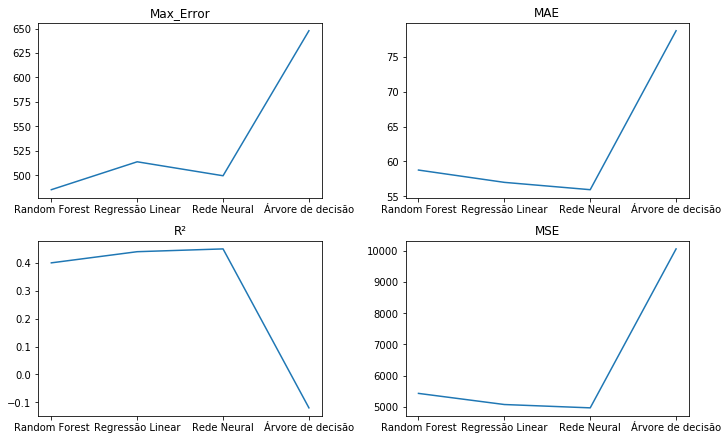

In [72]:

labels = df_metricasAL['Modelo']
colunas = ['Max_Error', 'MAE', 'R²', 'MSE']

#x = np.arange(0, size)

fig, axes = plt.subplots(2, 2, figsize=[10,6], constrained_layout=True)
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.plot(df_metricas['Modelo'], df_metricas['Max_Error'] )
ax0.set_title(colunas[0])

ax1.plot(df_metricas['Modelo'], df_metricas[ 'MAE'] )
ax1.set_title(colunas[1])

ax2.plot(df_metricas['Modelo'], df_metricas['R²'] )
ax2.set_title(colunas[2])

ax3.plot(df_metricas['Modelo'], df_metricas['MSE'] )
ax3.set_title(colunas[3])

#plt.legend()
plt.show()

In [4]:
df_respostaAL = pd.read_csv('microdadosRespostaAlagoas.csv', sep = ';', encoding='ISO 8859-1')
print(df_respostaAL.shape)
df_respostaAL[['NU_NOTA_MT_Random Forest','NU_NOTA_MT_Regressão Linear','NU_NOTA_MT_Rede Neural']]= df_respostaAL[['NU_NOTA_MT_Random Forest','NU_NOTA_MT_Regressão Linear','NU_NOTA_MT_Rede Neural' ]].applymap("{0:.1f}".format).astype('float64')
df_respostaAL = df_respostaAL.loc[:, ~df_respostaAL.columns.str.contains('^Unnamed')]
df_respostaAL.sample(5)

(19382, 7)


,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_MT_Random Forest,NU_NOTA_MT_Regressão Linear,NU_NOTA_MT_Rede Neural,NU_NOTA_MT_Árvore de decisão
8714,180011774014,431.1,536.6,488.9,439.9,480.8
10701,180008756852,502.4,483.0,511.9,480.6,444.6
6296,180012432220,392.8,470.4,475.5,469.1,429.1
15313,180008019317,464.1,512.9,537.0,519.2,635.3
8318,180007554914,504.6,542.6,516.0,480.7,477.4


In [5]:
df_respostaBR = pd.read_csv('microdadosRespostaNacional.csv', sep = ';', encoding='ISO 8859-1')
print(df_respostaBR.shape)
df_respostaBR[['NU_NOTA_MT_Random Forest','NU_NOTA_MT_Regressão Linear','NU_NOTA_MT_Rede Neural']]= df_respostaBR[['NU_NOTA_MT_Random Forest','NU_NOTA_MT_Regressão Linear','NU_NOTA_MT_Rede Neural' ]].applymap("{0:.1f}".format).astype('float64')
df_respostaBR = df_respostaBR.loc[:, ~df_respostaBR.columns.str.contains('^Unnamed')]
df_respostaBR.sample(5)

(19382, 7)


,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_MT_Random Forest,NU_NOTA_MT_Regressão Linear,NU_NOTA_MT_Rede Neural,NU_NOTA_MT_Árvore de decisão
9345,180013582788,469.5,427.8,443.3,459.9,375.4
9051,180010139157,477.8,512.3,462.0,467.9,436.0
418,180010827396,469.1,568.6,528.0,518.3,503.4
4223,180007816574,432.1,438.4,395.5,446.7,449.7
15650,180011081055,429.8,538.1,522.8,507.7,501.1


In [31]:
df_respostaAL = df_respostaAL.loc[:, ~df_respostaAL.columns.str.contains('^Unnamed')]
df_respostaAL.dtypes

NU_INSCRICAO                      int64
NU_NOTA_MT                      float64
NU_NOTA_MT_Random Forest        float64
NU_NOTA_MT_Regressão Linear     float64
NU_NOTA_MT_Rede Neural          float64
NU_NOTA_MT_Árvore de decisão    float64
dtype: object

In [30]:

df_resposta



,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_MT_Random Forest,NU_NOTA_MT_Regressão Linear,NU_NOTA_MT_Rede Neural,NU_NOTA_MT_Árvore de decisão
0,180013272216,571.4,602.8,594.1,596.7,533.0
1,180007664987,587.8,490.4,490.2,470.8,431.9
2,180007324620,390.9,499.8,466.8,467.5,432.6
3,180008690383,479.3,456.4,449.1,457.5,467.7
4,180013685090,480.2,461.9,486.0,498.5,414.9
...,...,...,...,...,...,...
19377,180007217035,495.7,480.4,514.7,517.0,491.7
19378,180008716811,459.4,481.4,452.3,454.1,439.9
19379,180011130270,530.8,474.9,485.9,489.8,539.4
19380,180007739742,456.2,614.2,600.2,595.3,562.0


NameError: name 'x' is not defined

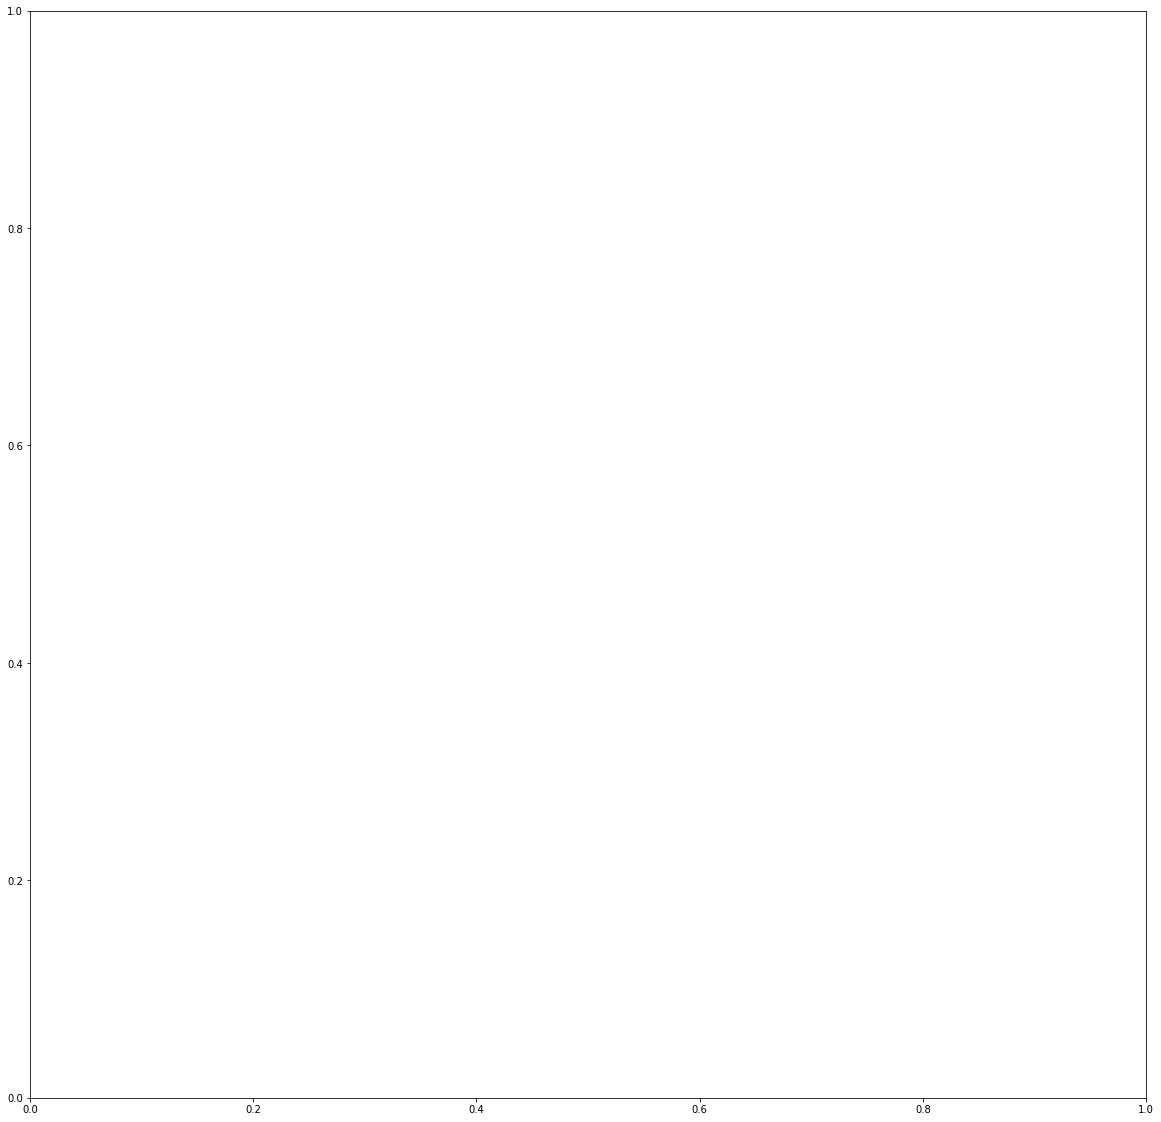

In [31]:
index = range(1, 5)
fig, ax = plt.subplots(figsize=(20, 20))
ax.boxplot(x,       vert=False,)
ax.set_title("Permutation Importances Random Forest (test set)", fontsize=15)

fig.tight_layout(pad=1.08, h_pad=5, w_pad=5, rect=None)
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
#plt.savefig('imagens/featuresImportances.png', format='png')

plt.show()


In [6]:

colunas = ['NU_NOTA_MT', 'NU_NOTA_MT_Random Forest',
       'NU_NOTA_MT_Regressão Linear', 'NU_NOTA_MT_Rede Neural',
       'NU_NOTA_MT_Árvore de decisão']
df_resposta['NU_NOTA_MT_Rede Neural']

NameError: name 'df_resposta' is not defined

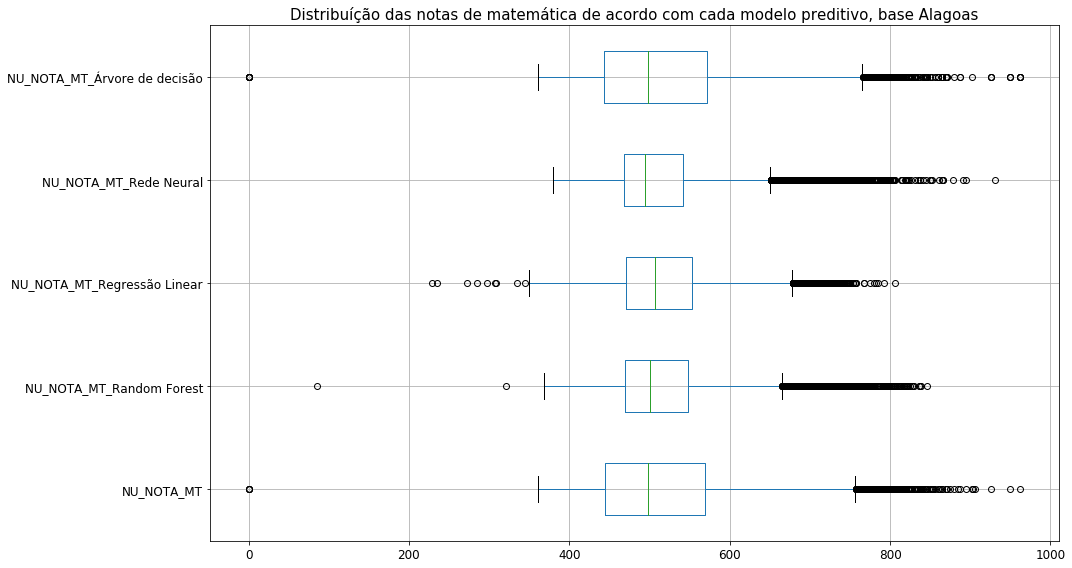

In [26]:
boxplot = df_respostaAL.boxplot(column=colunas, figsize=(15,8), fontsize=12, vert=False)
boxplot
boxplot.set_title('Distribuíção das notas de matemática de acordo com cada modelo preditivo, base Alagoas', fontsize=15)
plt.tight_layout(pad=1.08, h_pad=5, w_pad=5, rect=None)
#plt.subplots_adjust(left=-0.3, right=0.5, top=0.8, bottom=0.25)
plt.savefig('imagens/boxplot_MT_AL.png', format='png')

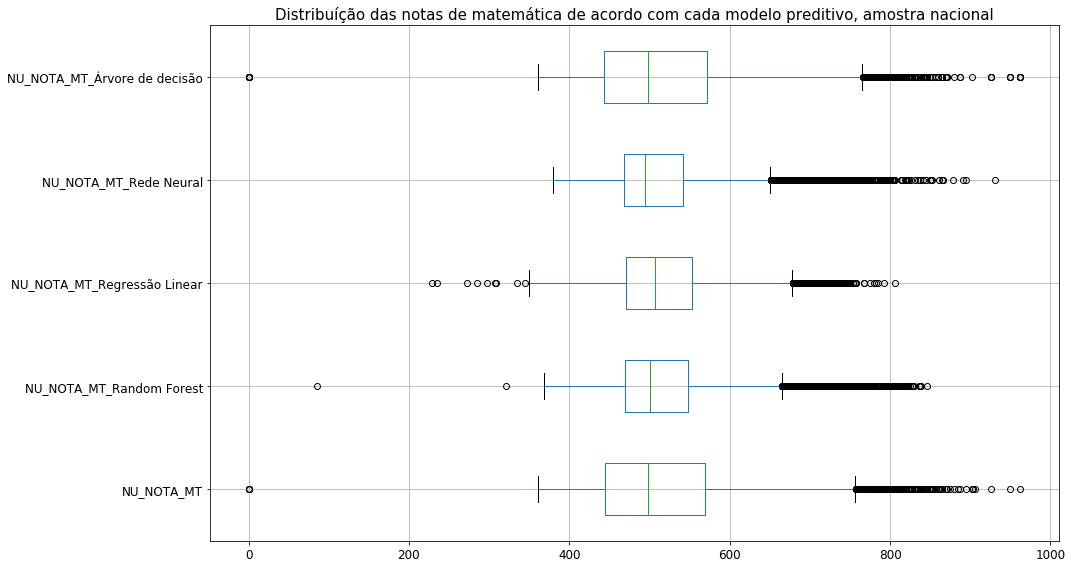

In [27]:
boxplot = df_respostaBR.boxplot(column=colunas, figsize=(10,8), fontsize=12, vert=False)
boxplot
boxplot.set_title('Distribuíção das notas de matemática de acordo com cada modelo preditivo, amostra nacional', fontsize=15)
plt.tight_layout(pad=1.08, h_pad=5, w_pad=5, rect=None)
plt.savefig('imagens/boxplot_MT_BR.png', format='png')

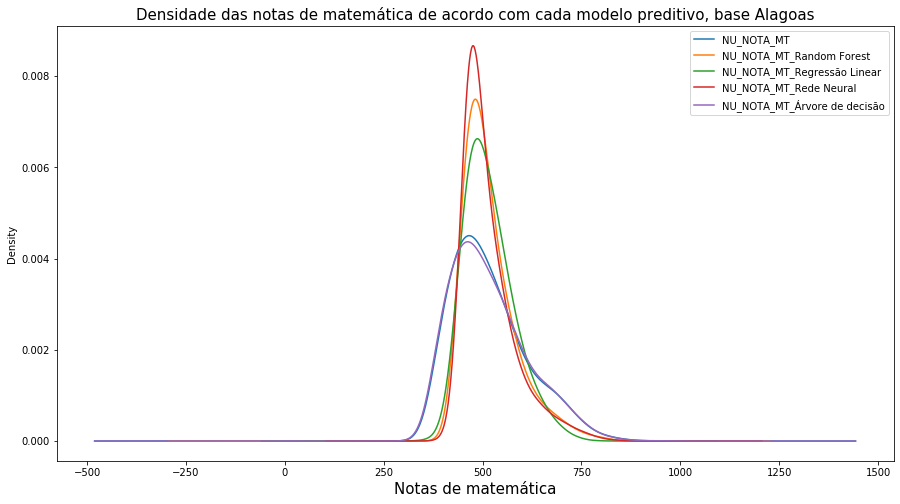

In [52]:
df = df_respostaAL[colunas]
kde = df.plot.kde(bw_method=0.3, figsize=(15,8))
kde.set_title('Densidade das notas de matemática de acordo com cada modelo preditivo, base Alagoas', fontsize=15)
kde.set_xlabel('Notas de matemática', fontsize=15)
plt.savefig('imagens/kde_MT_AL.png', format='png')


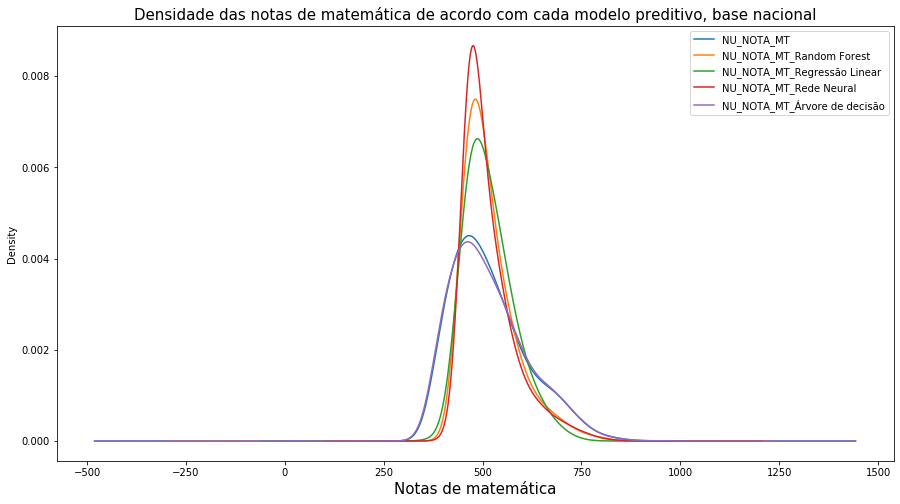

In [53]:
df = df_respostaBR[colunas]
kde = df.plot.kde(bw_method=0.3, figsize=(15,8))
kde.set_title('Densidade das notas de matemática de acordo com cada modelo preditivo, base nacional', fontsize=15)
kde.set_xlabel('Notas de matemática', fontsize=15)
plt.savefig('imagens/kde_MT_BR.png', format='png')

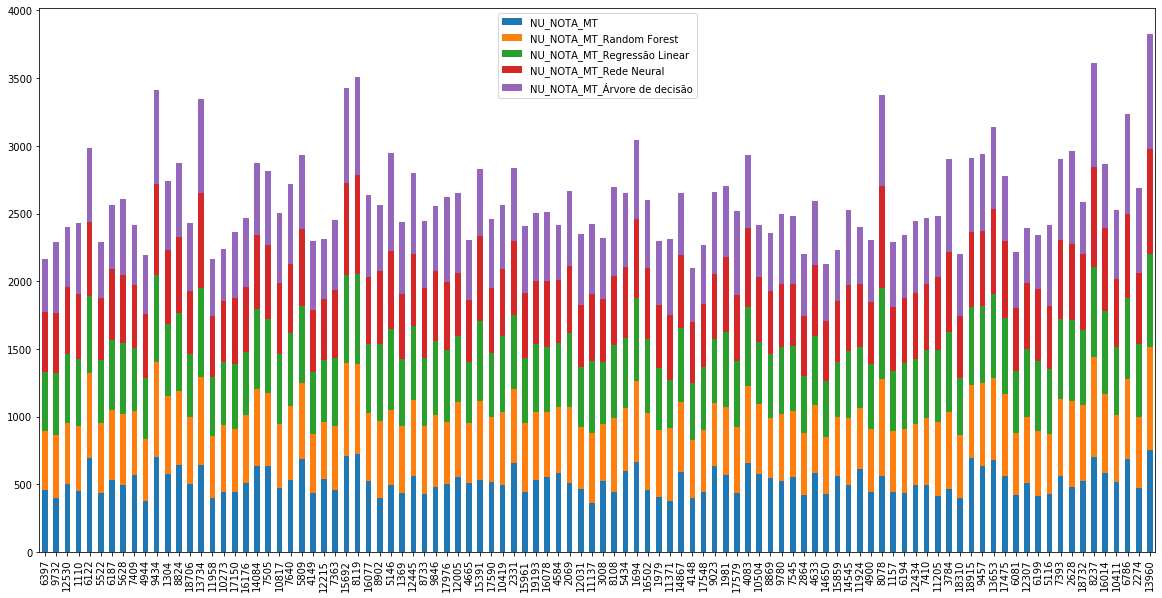

In [38]:
df.sample(100).plot.bar(stacked=True, figsize=(20,10));

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

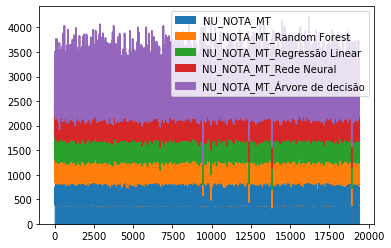

In [78]:
xticks = np.arange(0, 20000, 1000)
axs = df.plot.area()

plt.plot

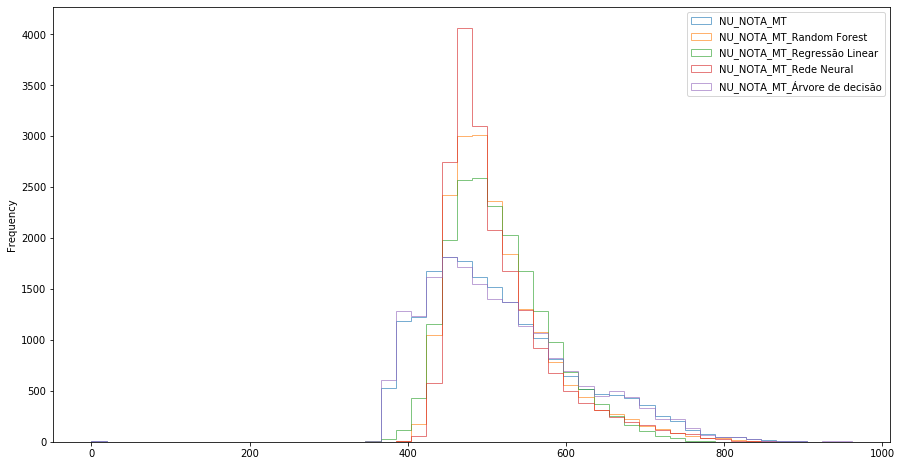

In [66]:
ax = df.plot.hist(bins=50, alpha=0.6, figsize=(15,8), histtype='step')

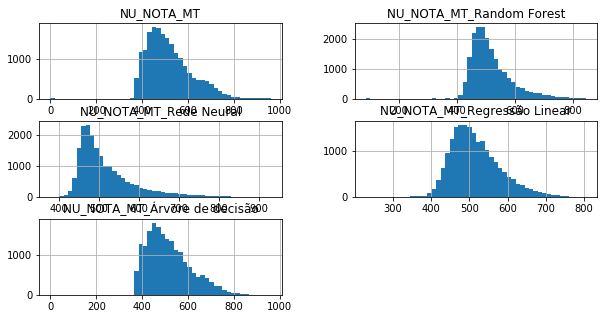

In [64]:
hist = df.hist(bins=50, figsize = (10,5))

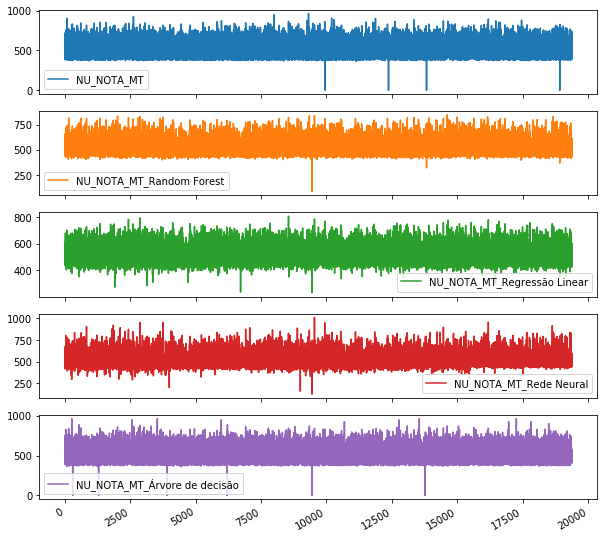

In [255]:
axes = df.plot.line(subplots = True, figsize = (10,10))

In [179]:
size = 100
data = df_resposta.sample(size).sort_values(by='NU_NOTA_MT')
data = data[colunas]
x = np.arange(0, size)
data.set_index([x])


,NU_NOTA_MT,NU_NOTA_MT_Random Forest,NU_NOTA_MT_Regressão Linear,NU_NOTA_MT_Rede Neural,NU_NOTA_MT_Árvore de decisão
0,384.7,495.20,489.627596,447.055760,475.7
1,385.1,521.88,507.622705,497.632849,434.8
2,394.5,440.34,435.837995,472.652098,509.4
3,399.0,532.09,568.794502,533.900942,468.3
4,399.3,517.59,489.714827,499.921053,452.5
...,...,...,...,...,...
95,717.9,602.22,654.939624,694.488135,536.0
96,728.7,633.01,604.113440,579.103082,525.0
97,745.0,719.71,650.593335,731.097465,710.2
98,763.7,665.99,688.035676,670.226649,500.8


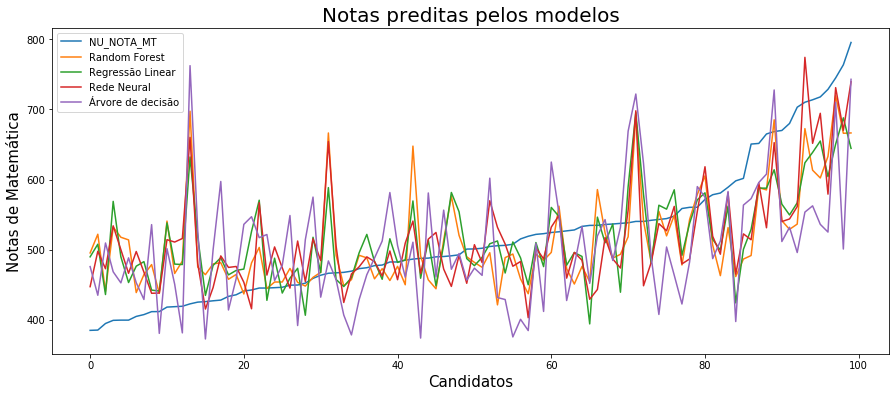

In [212]:

labels = ['NU_NOTA_MT','Random Forest', 'Regressão Linear', 'Rede Neural', 'Árvore de decisão']
colunas = ['NU_NOTA_MT', 'NU_NOTA_MT_Random Forest',
       'NU_NOTA_MT_Regressão Linear', 'NU_NOTA_MT_Rede Neural',
       'NU_NOTA_MT_Árvore de decisão']

x = np.arange(0, size)

fig, ax = plt.subplots(figsize=(15, 6))

for label, coluna in zip(labels, colunas):
    ax.plot(x, data[coluna], label = label)

plt.title("Notas preditas pelos modelos", fontsize=20)
plt.xlabel('Candidatos',fontsize=15 )
plt.ylabel('Notas de Matemática', fontsize=15)

plt.legend()
plt.show()

In [19]:
x = np.arange(0, len(df_resposta['NU_INSCRICAO']), 1000)
x

array([    0,  1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
        9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000,
       18000, 19000])

In [39]:
df_resposta.loc[10:, 'NU_NOTA_MT']

10       506.7
11       470.5
12       443.3
13       685.3
14       392.2
         ...  
19377    495.7
19378    459.4
19379    530.8
19380    456.2
19381    435.9
Name: NU_NOTA_MT, Length: 19372, dtype: float64